En este ejercicio se realizara una regresion lineal con multiples variables, buscando calcular el valor del CO2 dado los datos presentados.
La realizacion fue llevada gracias a Anaconda3 por lo que se debe cargar el banco de datos e instalar las librerias correspondientes

In [34]:
#librerias necesarias para el proceso
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm           # Proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf  # Permite ajustar modelos estadísticos utilizando fórmulas de estilo R

In [15]:
#lectura del archivo csv
ruta = './vehiculos_procesado.csv'
data = pd.read_csv(ruta, encoding="latin1")

In [16]:
data.head() # Sirve para mostrar la parte inicial de los datos 

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,consumo_std,desplazamiento_std
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,-0.653195,-0.613385
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,0.676220
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,-0.881324,-0.613385
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,0.676220
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,-0.881324,0.372783


Basado en logica (y un poco de investigacion en la siguiente pagina https://www.autonocion.com/calcular-el-co2-a-partir-del-consumo/) los datos a tomar seras los siguientes: Desplazamiento, Cilindros, Consumo y CO2.

In [17]:
# Seleccionar las variables independientes (X) y la variable dependiente (y).
X = data[['desplazamiento', 'cilindros']]
y = data['co2']
data.shape

(35539, 13)

In [39]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = reg.predict(X_test)

# Coeficiente
print(reg.coef_)

[ 11.548655     1.28979295 -19.85408681]


In [21]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 754.0205068281141


C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


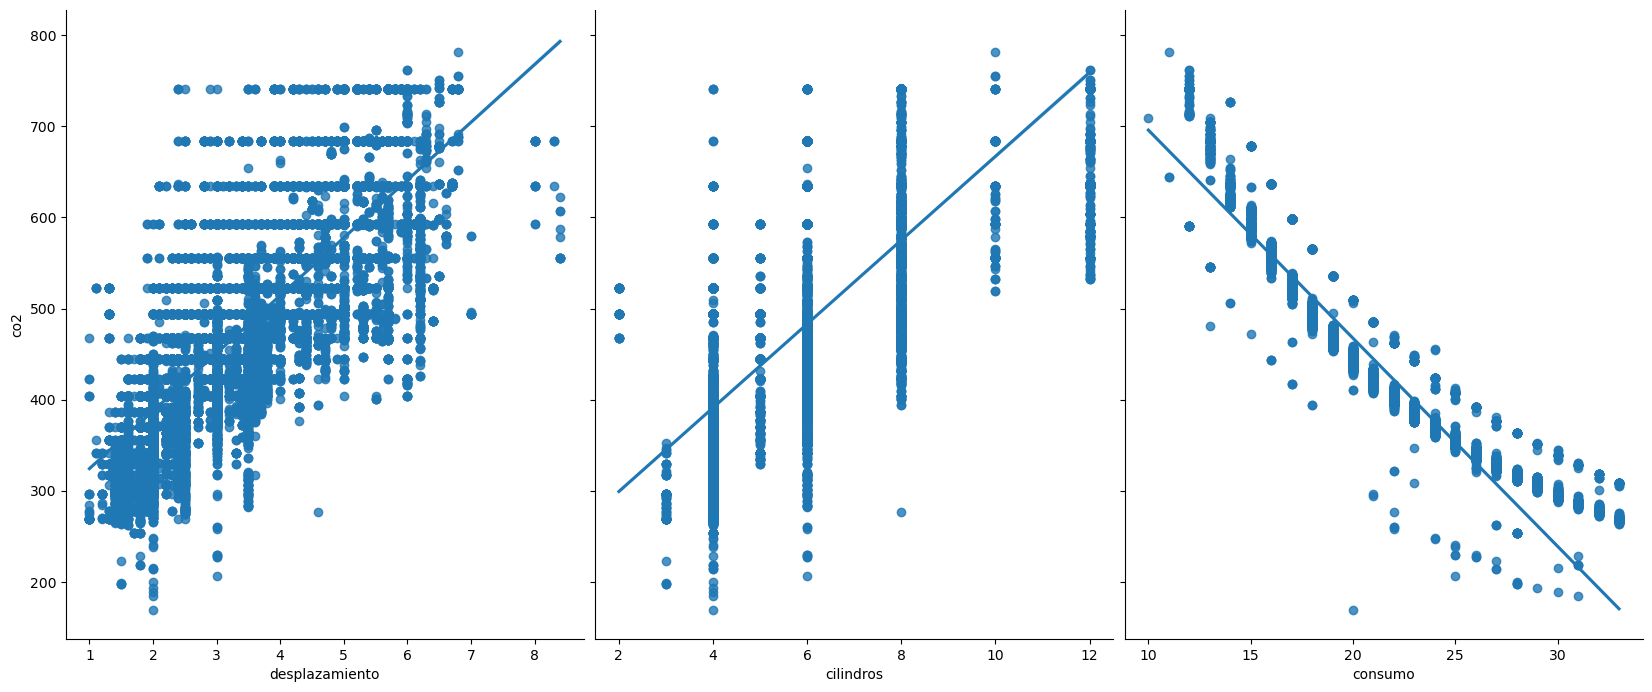

In [42]:
# Dispersión de la variables con respecto a CO2

import seaborn as sns  # Gráficos

sns.pairplot(data, x_vars=['desplazamiento','cilindros','consumo'], y_vars='co2', size=7, aspect=0.8,kind = 'reg')

# Conclusiones y Referencias
Basado en los graficos, podemos percibir que el consumo, si bien es importante, no nos ayuda mucho a predicir las emisiones de CO2, mientras que el desplazamiento/distancia y el cilindraje si

https://yuasaavedraco.github.io/Docs/Regresi%C3%B3n_Lineal_M%C3%BAltiple_con_Python.html -
https://www.codetodevs.com/regresion-lineal-multiple-con-python/ -
https://rpubs.com/alexmaar/949091